In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('/datasets/users_behavior.csv')

In [4]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [5]:
train_val, test = train_test_split(df, test_size=0.2, random_state=42)

In [6]:
train, val = train_test_split(train_val, test_size=0.25, random_state=42)


In [7]:
features_train = train.drop('is_ultra',axis=1)
target_train = train['is_ultra']

In [8]:
features_val = val.drop('is_ultra', axis=1)
target_val = val['is_ultra']

In [9]:
features_test = test.drop('is_ultra', axis=1)
target_test = test['is_ultra']

In [11]:
display(f"The training set shape is {features_train.shape} for features and {target_train.shape} for target.")
display(f"The validation set shape is {features_val.shape} for features and {target_val.shape} for target.")
display(f"The test set shape is {features_test.shape} for features and {target_test.shape} for target.")


'The training set shape is (1928, 4) for features and (1928,) for target.'

'The validation set shape is (643, 4) for features and (643,) for target.'

'The test set shape is (643, 4) for features and (643,) for target.'

In [12]:
tree_model = DecisionTreeClassifier(random_state=42)

In [13]:
tree_model.fit(features_train, target_train)

DecisionTreeClassifier(random_state=42)

In [14]:
tree_predictions = tree_model.predict

In [15]:
tree_predictions = tree_model.predict(features_val)

In [16]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(target_val, tree_predictions)
("Validation Accuracy:", accuracy)

('Validation Accuracy:', 0.7309486780715396)

In [20]:
test_predictions = tree_model.predict(features_test)


In [21]:
test_accuracy = accuracy_score(target_test, test_predictions)

In [22]:
("Test Accuracy:", test_accuracy)

('Test Accuracy:', 0.7325038880248833)

In [23]:
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [24]:
forest_model.fit(features_train, target_train)

RandomForestClassifier(random_state=42)

In [25]:
forest_predictions = forest_model.predict(features_val)

In [26]:
forest_accuracy = accuracy_score(target_val, forest_predictions)

In [27]:
("Validation Accuracy (Random Forest):", forest_accuracy)

('Validation Accuracy (Random Forest):', 0.7947122861586314)

In [28]:
forest_test_predictions = forest_model.predict(features_test)

In [29]:
forest_test_accuracy = accuracy_score(target_test, forest_test_predictions)

In [30]:
("Test Accuracy (Random Forest):", forest_test_accuracy)

('Test Accuracy (Random Forest):', 0.8087091757387247)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

In [33]:
logistic_model.fit(features_train, target_train)

LogisticRegression(max_iter=1000, random_state=42)

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

best_accuracy = 0
best_depth = 0

# Try depths from 1 to 20
for depth in range(1, 21):
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(features_train, target_train)  # Train model on training data
    predictions = model.predict(features_val)  # Predict using validation set
    accuracy = accuracy_score(target_val, predictions)  # Check how well it did

    display(f"Validation accuracy at depth {depth}: {accuracy:.4f}")

    # Keep track of the best one
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth




'Validation accuracy at depth 1: 0.7418'

'Validation accuracy at depth 2: 0.7745'

'Validation accuracy at depth 3: 0.7745'

'Validation accuracy at depth 4: 0.7807'

'Validation accuracy at depth 5: 0.7714'

'Validation accuracy at depth 6: 0.7792'

'Validation accuracy at depth 7: 0.7885'

'Validation accuracy at depth 8: 0.7714'

'Validation accuracy at depth 9: 0.7854'

'Validation accuracy at depth 10: 0.7652'

'Validation accuracy at depth 11: 0.7667'

'Validation accuracy at depth 12: 0.7683'

'Validation accuracy at depth 13: 0.7574'

'Validation accuracy at depth 14: 0.7636'

'Validation accuracy at depth 15: 0.7574'

'Validation accuracy at depth 16: 0.7589'

'Validation accuracy at depth 17: 0.7543'

'Validation accuracy at depth 18: 0.7372'

'Validation accuracy at depth 19: 0.7372'

'Validation accuracy at depth 20: 0.7309'

In [39]:
print(f"\nBest depth is {best_depth} with validation accuracy of {best_accuracy:.4f}")


Best depth is 7 with validation accuracy of 0.7885


In [40]:
features_combined = pd.concat([features_train, features_val])
target_combined = pd.concat([target_train, target_val])


final_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
final_model.fit(features_combined, target_combined)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [41]:
test_predictions = final_model.predict(features_test)

In [42]:
test_accuracy = accuracy_score(target_test, test_predictions)

In [44]:
print(f"\nTest accuracy of the final model: {test_accuracy:.4f}")


Test accuracy of the final model: 0.8103


In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Try different tree depths
best_accuracy = 0
best_depth = 0

for depth in range(1, 21):  # Trying max_depth from 1 to 20
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(features_train, target_train)  # Train the model on the training data
    predictions = model.predict(features_val)  # Predict on the validation data
    accuracy = accuracy_score(target_val, predictions)  # Check how good it did

    print(f"max_depth={depth}: Validation Accuracy = {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth




max_depth=1: Validation Accuracy = 0.7418
max_depth=2: Validation Accuracy = 0.7745
max_depth=3: Validation Accuracy = 0.7745
max_depth=4: Validation Accuracy = 0.7807
max_depth=5: Validation Accuracy = 0.7714
max_depth=6: Validation Accuracy = 0.7792
max_depth=7: Validation Accuracy = 0.7885
max_depth=8: Validation Accuracy = 0.7714
max_depth=9: Validation Accuracy = 0.7854
max_depth=10: Validation Accuracy = 0.7652
max_depth=11: Validation Accuracy = 0.7667
max_depth=12: Validation Accuracy = 0.7683
max_depth=13: Validation Accuracy = 0.7574
max_depth=14: Validation Accuracy = 0.7636
max_depth=15: Validation Accuracy = 0.7574
max_depth=16: Validation Accuracy = 0.7589
max_depth=17: Validation Accuracy = 0.7543
max_depth=18: Validation Accuracy = 0.7372
max_depth=19: Validation Accuracy = 0.7372
max_depth=20: Validation Accuracy = 0.7309


In [47]:
print(f"\n Best max_depth: {best_depth} with Validation Accuracy = {best_accuracy:.4f}")


 Best max_depth: 7 with Validation Accuracy = 0.7885


In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


tree_model = DecisionTreeClassifier(max_depth=10, random_state=42)
tree_model.fit(features_train, target_train)
tree_preds = tree_model.predict(features_val)
tree_acc = accuracy_score(target_val, tree_preds)
print(f'Decision Tree Accuracy: {tree_acc:.4f}')


forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(features_train, target_train)
forest_preds = forest_model.predict(features_val)
forest_acc = accuracy_score(target_val, forest_preds)
print(f'Random Forest Accuracy: {forest_acc:.4f}')


log_model = LogisticRegression(random_state=42, solver='liblinear')
log_model.fit(features_train, target_train)
log_preds = log_model.predict(features_val)
log_acc = accuracy_score(target_val, log_preds)
print(f'Logistic Regression Accuracy: {log_acc:.4f}')


Decision Tree Accuracy: 0.7652
Random Forest Accuracy: 0.7947
Logistic Regression Accuracy: 0.7216


In [50]:
features_combined = pd.concat([features_train, features_val])
target_combined = pd.concat([target_train, target_val])


final_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
final_model.fit(features_combined, target_combined)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [51]:
test_predictions = final_model.predict(features_test)
test_accuracy = accuracy_score(target_test, test_predictions)

print(f"\nTest accuracy of the final model: {test_accuracy:.4f}")


Test accuracy of the final model: 0.8103


In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


best_accuracy = 0
best_depth = 0

for depth in range(1, 21):  # Trying max_depth from 1 to 20
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(features_train, target_train)  # Train the model on the training data
    predictions = model.predict(features_val)  # Predict on the validation data
    accuracy = accuracy_score(target_val, predictions)  # Check how good it did

    print(f"max_depth={depth}: Validation Accuracy = {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth

print(f"\n Best max_depth: {best_depth} with Validation Accuracy = {best_accuracy:.4f}")


max_depth=1: Validation Accuracy = 0.7418
max_depth=2: Validation Accuracy = 0.7745
max_depth=3: Validation Accuracy = 0.7745
max_depth=4: Validation Accuracy = 0.7807
max_depth=5: Validation Accuracy = 0.7714
max_depth=6: Validation Accuracy = 0.7792
max_depth=7: Validation Accuracy = 0.7885
max_depth=8: Validation Accuracy = 0.7714
max_depth=9: Validation Accuracy = 0.7854
max_depth=10: Validation Accuracy = 0.7652
max_depth=11: Validation Accuracy = 0.7667
max_depth=12: Validation Accuracy = 0.7683
max_depth=13: Validation Accuracy = 0.7574
max_depth=14: Validation Accuracy = 0.7636
max_depth=15: Validation Accuracy = 0.7574
max_depth=16: Validation Accuracy = 0.7589
max_depth=17: Validation Accuracy = 0.7543
max_depth=18: Validation Accuracy = 0.7372
max_depth=19: Validation Accuracy = 0.7372
max_depth=20: Validation Accuracy = 0.7309

 Best max_depth: 7 with Validation Accuracy = 0.7885


In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


tree_model = DecisionTreeClassifier(max_depth=10, random_state=42)
tree_model.fit(features_train, target_train)
tree_preds = tree_model.predict(features_val)
tree_acc = accuracy_score(target_val, tree_preds)
print(f'Decision Tree Accuracy: {tree_acc:.4f}')


forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(features_train, target_train)
forest_preds = forest_model.predict(features_val)
forest_acc = accuracy_score(target_val, forest_preds)
print(f'Random Forest Accuracy: {forest_acc:.4f}')


log_model = LogisticRegression(random_state=42, solver='liblinear')
log_model.fit(features_train, target_train)
log_preds = log_model.predict(features_val)
log_acc = accuracy_score(target_val, log_preds)
print(f'Logistic Regression Accuracy: {log_acc:.4f}')


Decision Tree Accuracy: 0.7652
Random Forest Accuracy: 0.7947
Logistic Regression Accuracy: 0.7216


In [55]:
features_combined = pd.concat([features_train, features_val])
target_combined = pd.concat([target_train, target_val])


final_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
final_model.fit(features_combined, target_combined)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [56]:
accuracies = {
    'Decision Tree': tree_acc,
    'Random Forest': forest_acc,
    'Logistic Regression': log_acc
}

# Find the best model and its score
best_model_name = max(accuracies, key=accuracies.get)
best_model_score = accuracies[best_model_name]

print(f'\n Best Model: {best_model_name} with validation accuracy {best_model_score:.4f}')



 Best Model: Random Forest with validation accuracy 0.7947


In [57]:
if best_model_score > 0.75:
    print(" Success! The best model passed the accuracy threshold.")
else:
    print(" The best model did not reach the 0.75 threshold. Try tuning hyperparameters.")


 Success! The best model passed the accuracy threshold.


In [58]:
features_combined = pd.concat([features_train, features_val])
target_combined = pd.concat([target_train, target_val])


final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(features_combined, target_combined)


test_preds = final_model.predict(features_test)
test_acc = accuracy_score(target_test, test_preds)
print(f'\nTest Accuracy of Final Model: {test_acc:.4f}')


Test Accuracy of Final Model: 0.8103


In [59]:
final_predictions = final_model.predict(features_test)
test_accuracy = accuracy_score(target_test, final_predictions)

print(f"\n Final Test Accuracy = {test_accuracy:.4f}")


 Final Test Accuracy = 0.8103


In [60]:
logistic_predictions = logistic_model.predict(features_val)
logistic_accuracy = accuracy_score(target_val, logistic_predictions)
("Validation Accuracy (Logistic Regression):", logistic_accuracy)

('Validation Accuracy (Logistic Regression):', 0.7200622083981337)

In [61]:
logistic_test_predictions = logistic_model.predict(features_test)
logistic_test_accuracy = accuracy_score(target_test, logistic_test_predictions)
("Test Accuracy (Logistic Regression):", logistic_test_accuracy)

('Test Accuracy (Logistic Regression):', 0.702954898911353)

In [62]:
features_test = test.drop('is_ultra', axis=1)
target_test = test['is_ultra']

In [63]:
test_predictions = forest_model.predict(features_test)

In [64]:
test_accuracy = accuracy_score(target_test, test_predictions)
("Test Accuracy (Random Forest):", test_accuracy)

('Test Accuracy (Random Forest):', 0.8087091757387247)

In [66]:
importances = forest_model.feature_importances_


for feature_name, importance in zip(features_train.columns, importances):
    display(f"{feature_name}: {importance:.4f}")

'calls: 0.2227'

'minutes: 0.2694'

'messages: 0.1926'

'mb_used: 0.3153'

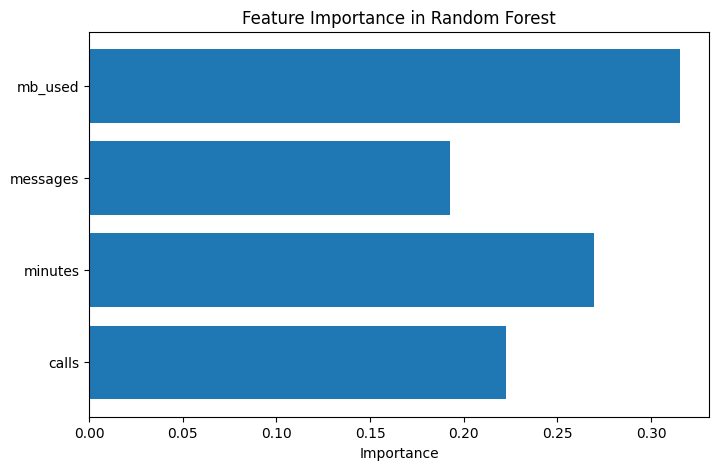

In [67]:
import matplotlib.pyplot as plt


importances = forest_model.feature_importances_


feature_names = features_train.columns


plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances)
plt.xlabel("Importance")
plt.title("Feature Importance in Random Forest")
plt.show()

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
test_predictions = forest_model.predict(features_test)

In [72]:
cm = confusion_matrix(target_test, test_predictions)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[416  39]
 [ 84 104]]


In [73]:
import numpy as np

unique, counts = np.unique(test_predictions, return_counts=True)
print("Prediction breakdown:", dict(zip(unique, counts)))

Prediction breakdown: {0: 500, 1: 143}


In [74]:
for i in range(10):
    print(f"Predicted: {test_predictions[i]}, Actual: {target_test.iloc[i]}")

Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 1
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
